## Numerical Solution of 1D Diffusion Equation

Diffusion equation for 1D:
<img src="files/dif1.png" >
Initial conditions: P(x,0) = 1 when x=0, 0 otherwise\
Boundary conditions: P(-L,t) = P(L,t) = 0, t>0\
Using Forward Euler Scheme: method for solving ordinary differential equations using the formula

 y_(n+1) = y_n + hf(x_n,y_n), \
which advances a solution from x_n to x_(n+1) = x_n + h


Storing P(t,x) in 2d array, plotting the P(t,x) vs x

In [19]:
from matplotlib import pyplot as plt
import numpy as np

In [20]:
L = 1.0 
k = 20  
T = 10  
N = 16
D = 0.1


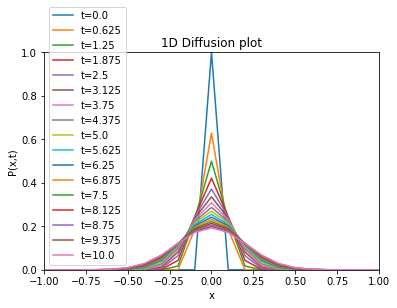

In [21]:
x = (L * 2) / k 
t = T / N  
P = [[0.0 for __ in range(k+1)] for _ in range(N+1)]
P[0][int(k / 2)] = 1.0

val = sum([y**2 for y in P[0]])

plt.plot([x * i - L for i in range(k+1)],[(y**2)/val for y in P[0]], label=f't={0.0}')

for n in range(1, N+1):
    for i in range(1, k):
        P[n][i] = P[n-1][i] + ((D * t) / (x**2)) * \
            (P[n-1][i+1] + -2*P[n-1][i] + P[n-1][i-1])
    
    val = sum([y**2 for y in P[n]])
    
    plt.plot([x * i - L for i in range(k+1)],
             [(y**2)/val for y in P[n]], label=f't={round(t*n,4)}')
plt.axis([L*(-1), L, 0, 1])
plt.title("1D Diffusion plot")
plt.xlabel("x")
plt.ylabel("P(x,t)")
plt.legend()
plt.show()

## Numerical solution of 2D Diffusion equation
<img src="files/dif2.png">
where Dx, D are diffusion constants for x, y respectively

In [22]:
Nt = [10, 100, 1000, 10000] 
L = 1.0 
k = 20  
T = 10  
N = Nt[-1]


### When Dx = Dy

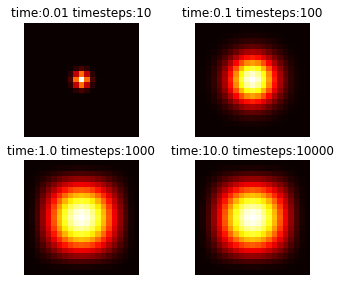

In [23]:
# Dx = Dy
Dx = 0.9  
Dy = 0.9 

x = (L * 2) / k 
y = (L * 2) / k

fig = plt.figure()
t = T / N  
P = [[[0.0 for ___ in range(k+1)] for __ in range(k+1)] for _ in range(N+1)] 
P[0][int(k / 2)][int(k / 2)] = 1.0
for n in range(1, N+1):
    for i in range(1, k):
        for j in range(1, k):
            P[n][i][j] = P[n-1][i][j] + \
                ((Dx * t) / (x**2)) * (P[n-1][i+1][j]+P[n-1][i-1][j]-P[n-1][i][j]*2) + \
                ((Dy * t) / (y**2)) * \
                (P[n-1][i][j+1]+P[n-1][i][j-1]-P[n-1][i][j]*2)
    if n in Nt:
        ax = fig.add_subplot(221+Nt.index(n))
        im = ax.imshow([[y**2 for y in lst] for lst in P[n]],
                       cmap=plt.get_cmap('hot'), vmin=0.0, vmax=max([max([y**2 for y in lst]) for lst in P[n]]))
        ax.set_axis_off()
        ax.set_title('time:'+ str(round(t*n,4)) + ' timesteps:' + str(n))
fig.subplots_adjust(right=0.85, top=1)
plt.show()



### When Dx > Dy

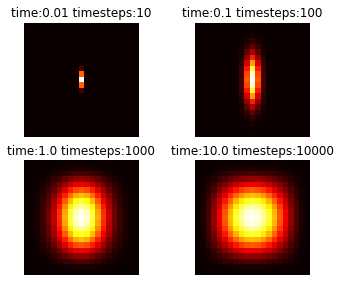

In [26]:
# Dx > Dy
Dx = 0.9  
Dy = 0.1  

fig = plt.figure()
for n in range(1, N+1):
    for i in range(1, k):
        for j in range(1, k):
            P[n][i][j] = P[n-1][i][j] + \
                ((Dx * t) / (x**2)) * (P[n-1][i+1][j]+P[n-1][i-1][j]-P[n-1][i][j]*2) + \
                ((Dy * t) / (y**2)) * \
                (P[n-1][i][j+1]+P[n-1][i][j-1]-P[n-1][i][j]*2)
    if n in Nt:
        ax = fig.add_subplot(221+Nt.index(n))
        im = ax.imshow([[y**2 for y in lst] for lst in P[n]],
                       cmap=plt.get_cmap('hot'), vmin=0.0, vmax=max([max([y**2 for y in lst]) for lst in P[n]]))
        ax.set_axis_off()
        ax.set_title('time:'+ str(round(t*n,4)) + ' timesteps:' + str(n))
fig.subplots_adjust(right=0.85, top=1)
plt.show()

### When Dx < Dy

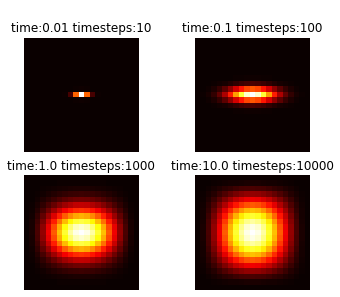

In [27]:
# Dx < Dy
Dx = 0.1 
Dy = 0.9

fig = plt.figure()
for n in range(1, N+1):
    for i in range(1, k):
        for j in range(1, k):
            P[n][i][j] = P[n-1][i][j] + \
                ((Dx * t) / (x**2)) * \
                (P[n-1][i+1][j]+P[n-1][i-1][j]-P[n-1][i][j]*2) + \
                ((Dy * t) / (y**2)) * \
                (P[n-1][i][j+1]+P[n-1][i][j-1]-P[n-1][i][j]*2)
    if n in Nt:
        ax = fig.add_subplot(221+Nt.index(n))
        im = ax.imshow([[y**2 for y in lst] for lst in P[n]],cmap=plt.get_cmap('hot'), vmin=0.0, vmax=max([max([y**2 for y in lst]) for lst in P[n]]))
        ax.set_axis_off()
        ax.set_title('\ntime:'+ str(round(t*n,4)) + ' timesteps:' + str(n))
fig.subplots_adjust(right=0.85, top=1)
plt.show()